In [28]:
import pandas as pd

df=pd.read_csv('..\\data\\fraud.csv', index_col = 0)
y = df['Class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'Class').values

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.40, 
                                    random_state=1)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#--------------------------------------------------
## ------------ SVM Classifier ------------------## 
#--------------------------------------------------

from sklearn.svm import SVC

## Linear Kernel  ---------------
steps = [('scaler', StandardScaler()),         
         ('svc', SVC(kernel = 'linear',
                     class_weight='balanced'))]

svcL_pipeline = Pipeline(steps)
svcL_pipeline.fit(X_train, y_train)

## Polynomial Kernel -----------------------
steps = [('scaler', StandardScaler()),         
         ('svc', SVC(kernel = 'poly', degree = 3, 
                     class_weight='balanced'))]

svcPoly_pipeline = Pipeline(steps)
svcPoly_pipeline.fit(X_train, y_train)

## RBF Kernel -----------------------
steps = [('scaler', StandardScaler()),         
         ('svc', SVC(kernel = 'rbf', gamma = 'scale',
                     class_weight='balanced'))]

svcRBF_pipeline = Pipeline(steps)
svcRBF_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [31]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_pred_svcL = svcL_pipeline.predict(X_test)


cm_svcL = confusion_matrix(y_test, y_pred_svcL)
print(f"Linear Kernel Results\n{cm_svcL}")

report_svcL = classification_report(y_test, y_pred_svcL)
print(report_svcL)

y_scores_svcL = svcL_pipeline.decision_function(X_test)
auc_svcL = roc_auc_score(y_test, y_scores_svcL)
print(f"AUC: {auc_svcL:.4f}")

Linear Kernel Results
[[8299  242]
 [  16  121]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8541
           1       0.33      0.88      0.48       137

    accuracy                           0.97      8678
   macro avg       0.67      0.93      0.73      8678
weighted avg       0.99      0.97      0.98      8678

AUC: 0.9515


In [32]:
y_pred_svcPoly = svcPoly_pipeline.predict(X_test)

cm_svcPoly = confusion_matrix(y_test, y_pred_svcPoly)
print(f"Polynomial Kernel Results\n{cm_svcPoly}")

report_svcPoly = classification_report(y_test, y_pred_svcPoly)
print(report_svcPoly)

y_scores_svcPoly = svcPoly_pipeline.decision_function(X_test)
auc_svcPoly = roc_auc_score(y_test, y_scores_svcPoly)
print(f"AUC: {auc_svcPoly:.4f}")

Polynomial Kernel Results
[[8485   56]
 [  28  109]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8541
           1       0.66      0.80      0.72       137

    accuracy                           0.99      8678
   macro avg       0.83      0.89      0.86      8678
weighted avg       0.99      0.99      0.99      8678

AUC: 0.9212


In [33]:

y_pred_svcRBF = svcRBF_pipeline.predict(X_test)

cm_svcRBF = confusion_matrix(y_test, y_pred_svcRBF)
print(f"RBF Kernel Results\n{cm_svcRBF}")


report_svcRBF = classification_report(y_test, y_pred_svcRBF)
print(report_svcRBF)


y_scores_svcRBF = svcRBF_pipeline.decision_function(X_test)
auc_svcRBF = roc_auc_score(y_test, y_scores_svcRBF)
print(f"AUC: {auc_svcRBF:.4f}")

RBF Kernel Results
[[8450   91]
 [  31  106]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8541
           1       0.54      0.77      0.63       137

    accuracy                           0.99      8678
   macro avg       0.77      0.88      0.81      8678
weighted avg       0.99      0.99      0.99      8678

AUC: 0.9723


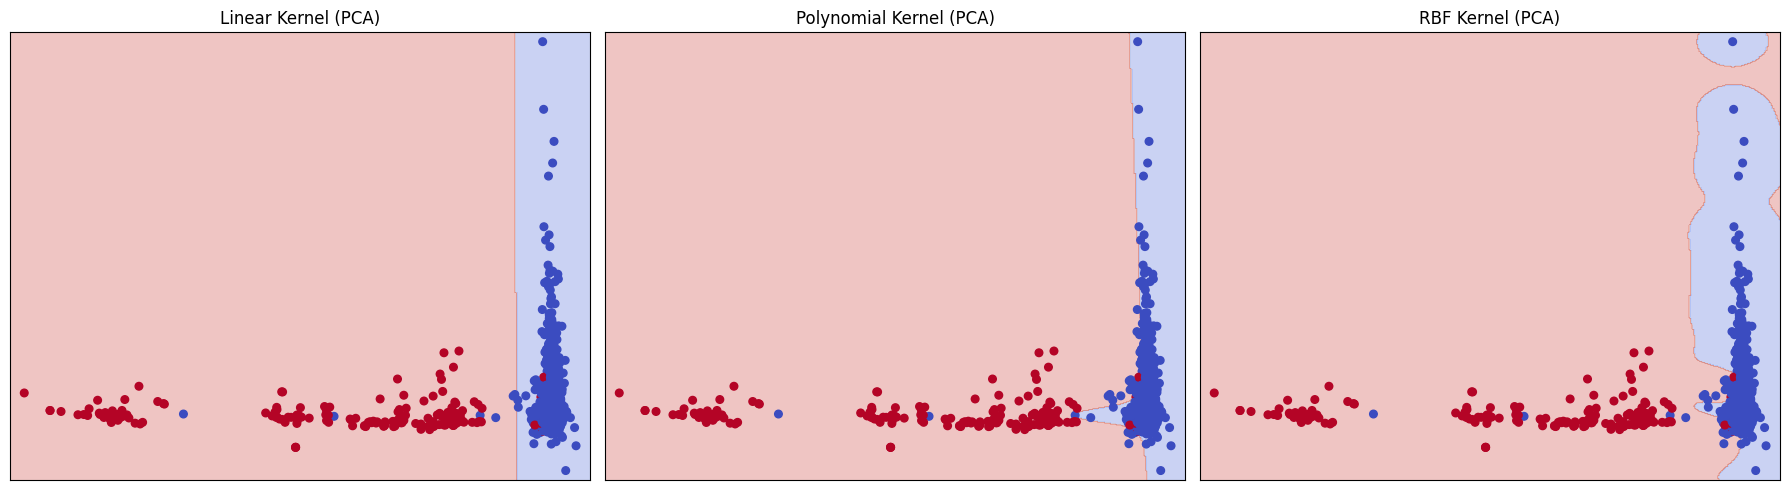

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create pipelines for visualization (StandardScaler -> PCA -> SVC)
svcL_pca_pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2)), ('svc', SVC(kernel='linear', class_weight='balanced'))])
svcPoly_pca_pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2)), ('svc', SVC(kernel='poly', degree=3, class_weight='balanced'))])
svcRBF_pca_pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2)), ('svc', SVC(kernel='rbf', gamma='scale', class_weight='balanced'))])

# Fit these new pipelines on the training data.
svcL_pca_pipeline.fit(X_train, y_train)
svcPoly_pca_pipeline.fit(X_train, y_train)
svcRBF_pca_pipeline.fit(X_train, y_train)


X_train_pca = svcL_pca_pipeline.named_steps['pca'].fit_transform(svcL_pca_pipeline.named_steps['scaler'].fit_transform(X_train))


def plot_decision_boundary(pipeline, X, y, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

   
    Z = pipeline.named_steps['svc'].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

# Create the plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot the decision boundaries using the fitted pipelines
plot_decision_boundary(svcL_pca_pipeline, X_train_pca, y_train, "Linear Kernel (PCA)", axes[0])
plot_decision_boundary(svcPoly_pca_pipeline, X_train_pca, y_train, "Polynomial Kernel (PCA)", axes[1])
plot_decision_boundary(svcRBF_pca_pipeline, X_train_pca, y_train, "RBF Kernel (PCA)", axes[2])

plt.tight_layout()
plt.show()